# Task 01

Read the file Task0.jpg, which is a 1024x768, 256-grayscale image taken on a bright sunny day. 
Unfortunately, the image was taken in the shadow of a building and the not-so-great camera 
couldn’t compensate for the bright blue sky and the dark shadow simultaneously. As a result, the 
sunlight areas are a glaring white, and the shadow areas are dark and low contrast. Using the image 
enhancement techniques covered in class, increase the contrast and the brightness of the dark 
areas, and reduce the brightness of the sunny areas. Your goal is an image which looks like it might 
be taken at noon on a cloudy day. The report also should describe in detail the technique(s) which 
you applied along with output image. You will be graded in part on the quality of your enhanced 
image, so do your best!


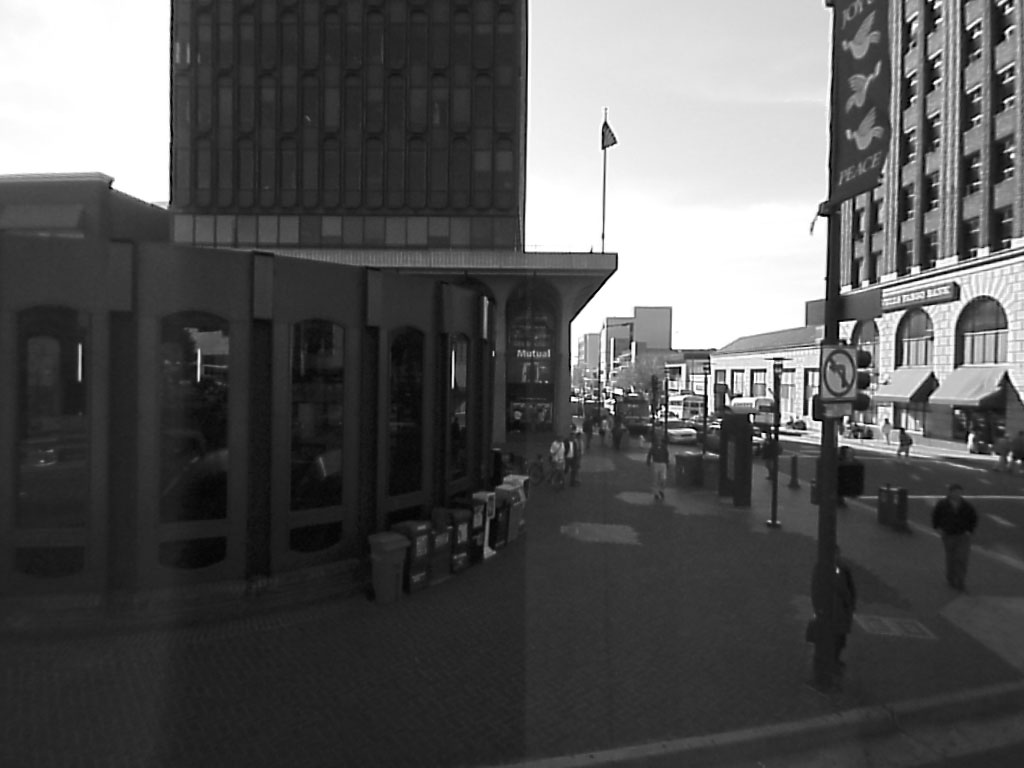

In [37]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np 
from matplotlib import pyplot as plt
# read image
img = cv2.imread('/content/Task0.jpg')
cv2_imshow(img)

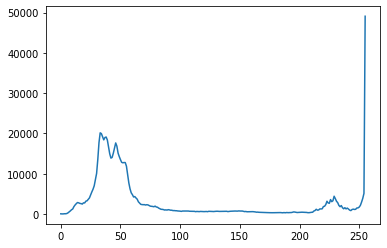

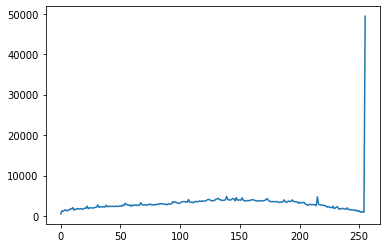

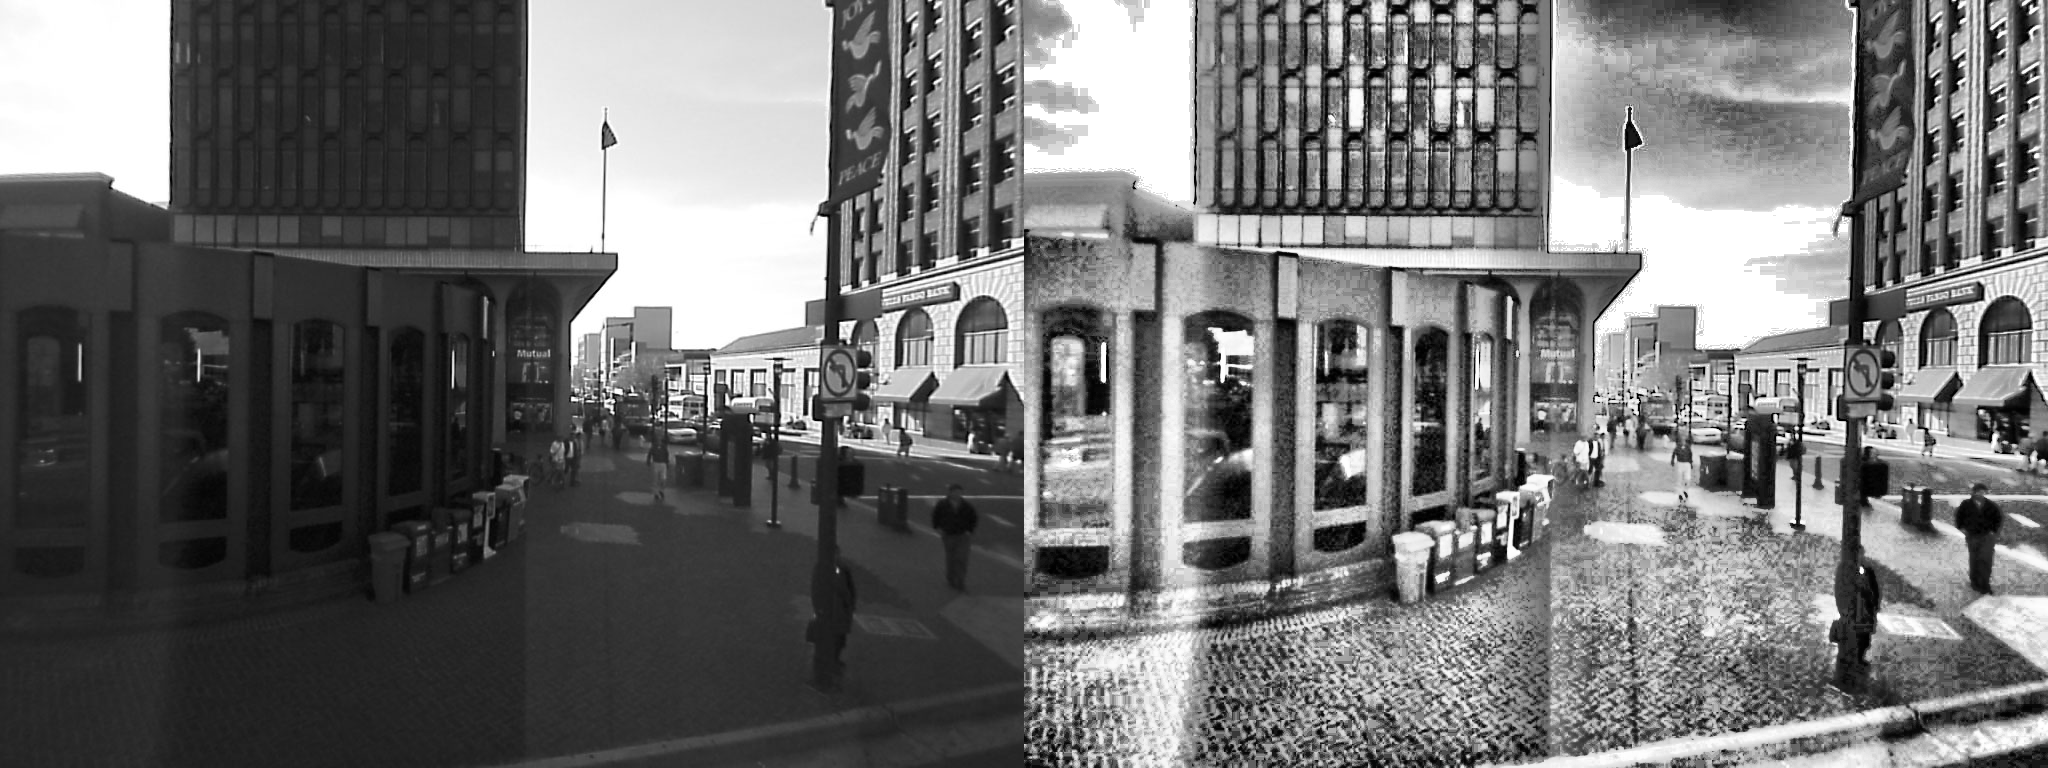

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('Task0.jpg',0)

clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

histr = cv2.calcHist([img],[0],None,[256],[0,256])
# show the histogram of original image
plt.plot(histr)
plt.show()
histr1 = cv2.calcHist([cl1],[0],None,[256],[0,256])
# show the histogram of equalized image
plt.plot(histr1)
plt.show()
compare = np.concatenate((img, cl1), axis=1)
cv2_imshow(compare)

# TASK O2
In the attachment, you are given an object’s template (e.g., wheel), and an image showing many 
instances of that object (e.g., a car with wheels). Write a Python function for detecting the object in 
the given image. The input to your program is: (i) car, and (ii) template. Your report should include: 

i. A well commented code

ii. Figure showing the correlation results and the caption. 

iii. List (x, y) coordinates of all your object detections in the image

original


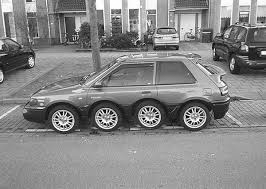

Astori Detection 


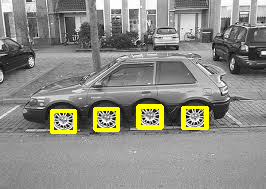

In [38]:
# Python program to illustrate
# template matching
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Read the main image
img_rgb = cv2.imread('/content/car.png')
img_rgb1 = cv2.imread('/content/car.png')

# Convert it to grayscale

# Read the template
template = cv2.imread('/content/template.png', 0)
kha=np.concatenate((img_rgb1,img_rgb1),axis=1)
# kha=np.concatenate((img_rgb1,template),axis=1)

# Store width and height of template in w and h
w, h = template.shape[::-1]
# print(w,h)

# Perform match operations.
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Specify a threshold
threshold = 0.3

# Store the coordinates of matched area in a numpy array
loc = np.where(res >= threshold)

# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
	cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

# Show the final image with the matched area.
print('original')
cv2_imshow( img_rgb1)
print("Astori Detection ")
cv2_imshow( img_rgb)


# task 03
Download the images “noisy1.png” and “noisy2.png” from the attachment. Load the image using 
the imread. Subsequently, filter each of the images using the Gaussian and the Median filters. For 
the Gaussian filter, try using different values for the standard deviation of the kernel. Find the 
standard deviation which gives the minimum mean squared error (The original image required to 
calculate the mean squared error can be downloaded from the attachment). Remember to change 
the size of the filter according to the standard deviation of the kernel. Similarly, try different size of 
the median filter to get the minimum mean squared error. Display the resulting images and compute 
the mean squared error for the best scenario in each case.

i. Comment on your observations.

ii. Well commented code as well as the resulting images.


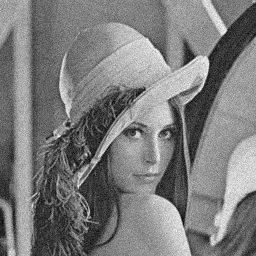

gussain


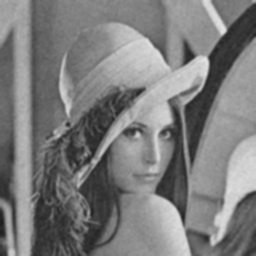

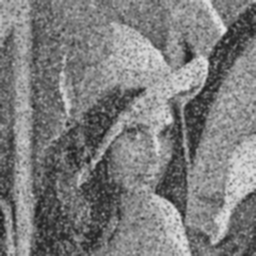

median


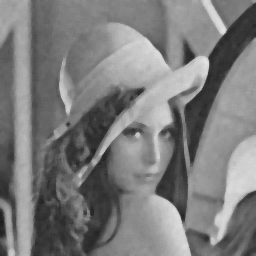

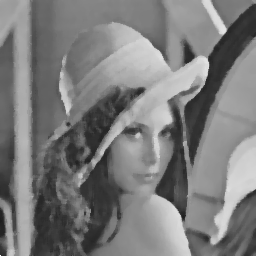

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel

2644322.0 4362761.0 3630429.0 5857716.0 4362777.0 3630430.0
The mean square error of original and noisy2 
 40.349151611328125
The mean square error of original and noisy1
 66.57044982910156
The mean square error of original and Gussain1 
 55.39595031738281
The mean square error original and Gussain2 
 89.38165283203125
The mean square error original and meadian 
 66.57069396972656
The mean square error original and meadian2 
 55.395965576171875


In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/noisy1.png',0)
img1 = cv2.imread('/content/noisy2.png',0)
img3 = cv2.imread('/content/lena_original.png',0)
cv2_imshow(img)
print("gussain")
blur = cv2.GaussianBlur(img,(5,5),0)
cv2_imshow(blur)
blur1 = cv2.GaussianBlur(img1,(5,5),0)
cv2_imshow(blur1)
print("median")
median = cv2.medianBlur(img,5)
cv2_imshow(median)
median1 = cv2.medianBlur(img1,5)
cv2_imshow(median1)
sum0 = 0.0
sum = 0.0
sum1 = 0.0
sum2= 0.0
for i in range(img.shape[0]):
   for j in range(img.shape[1]):
      difference0 = img3[i,j] - img1[i,j]

      difference = img3[i,j] - img[i,j]
      difference0 = img3[i,j] - img1[i,j]
      difference1 = img3[i,j] - blur[i,j]
      difference2 = img3[i,j] - blur1[i,j]
      difference3 = img3[i,j] - median[i,j]
      difference4 = img3[i,j] - median1[i,j]
      sum = sum + difference*difference
      sum0 = sum0 + difference0*difference0
      sum1 = sum1 + difference1*difference1
      sum2= sum2 + difference2*difference2
      sum3 = sum + difference3*difference3
      sum4 = sum1 + difference4*difference4
print(sum0,sum,sum1,sum2,sum3,sum4)
mse0 = sum0 /(img.shape[0]*img.shape[1])
mse = sum /(img.shape[0]*img.shape[1])
mse1 = sum1 /(img.shape[0]*img.shape[1])
mse2 = sum2 /(img.shape[0]*img.shape[1])
mse3 = sum3 /(img.shape[0]*img.shape[1])
mse4 = sum4 /(img.shape[0]*img.shape[1])
print("The mean square error of original and noisy2 \n",mse0)
print("The mean square error of original and noisy1\n",mse)
print("The mean square error of original and Gussain1 \n",mse1)
print("The mean square error original and Gussain2 \n",mse2)
print("The mean square error original and meadian \n",mse3)
print("The mean square error original and meadian2 \n",mse4)

# Task 04
Write Python code to remove noise from the images Q4_1, and Q4_3. Propose both spatial domain 
and frequency domain filtering solutions to achieve the best results

Original


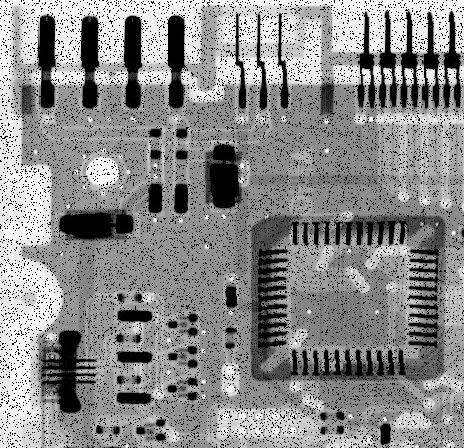

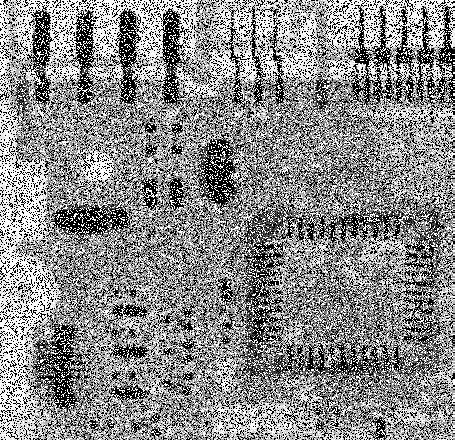

gussain


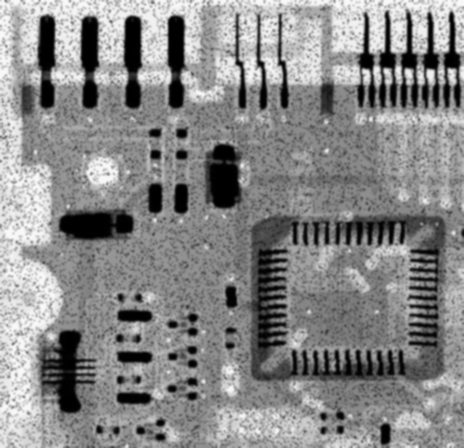

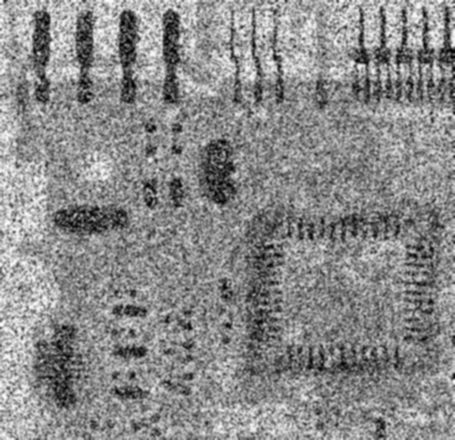

median


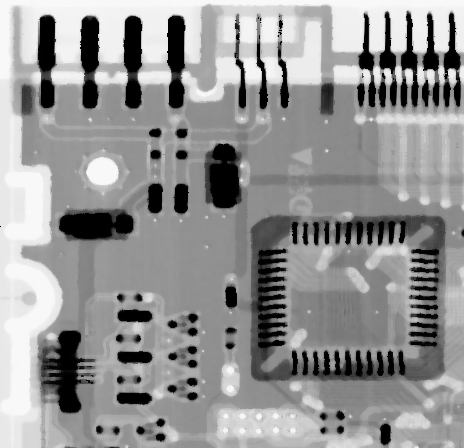

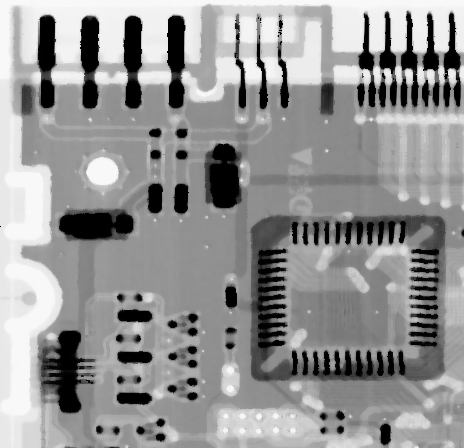

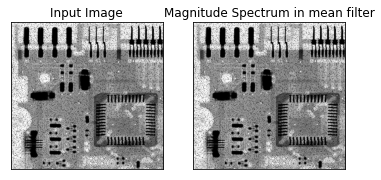

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/Q4_1.tif',0)
img1 = cv2.imread('/content/Q4_3.tif',0)
print("Original")
cv2_imshow(img)
cv2_imshow(img1)
print("gussain")
blur = cv2.GaussianBlur(img,(5,5),0)
cv2_imshow(blur)
blur1 = cv2.GaussianBlur(img1,(5,5),0)
cv2_imshow(blur1)
print("median")
median = cv2.medianBlur(img,5)
cv2_imshow(median)
median1 = cv2.medianBlur(img,5)
cv2_imshow(median1)
# f = np.fft.fft2(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fft_filter = np.fft.fft2(median, s=[198,220])
shifted_filter = np.fft.fftshift(fft_filter)
mask = shifted_filter
# fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum in mean filter'), plt.xticks([]), plt.yticks([])
plt.show()

frequencey Domain


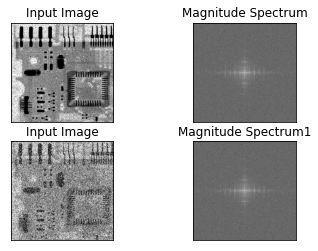

In [42]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
print('frequencey Domain')
img = cv2.imread('/content/Q4_1.tif',0)
img1 = cv2.imread('/content/Q4_3.tif',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
dft1 = cv2.dft(np.float32(img1),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
magnitude_spectrum1 = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(img1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum1'), plt.xticks([]), plt.yticks([])
plt.show()